In [1]:
from keras.datasets import mnist
import numpy as np

def f(nval=1000):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    x_val = x_train[-nval:]
    y_val = y_train[-nval:]
    x_train = x_train[:-nval]
    y_train = y_train[:-nval]
    Y_train = np_utils.to_categorical(y_train, 10)
    Y_val = np_utils.to_categorical(y_val, 10)
    Y_test = np_utils.to_categorical(y_test, 10)
    return (x_train, Y_train), (x_test, Y_test), (x_val, Y_val)

Using Theano backend.


a) Entrenamiento de autoencoders con sigmoid y relu

In [19]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import np_utils
from keras.optimizers import SGD

# Obtener conjuntos de datos

train, test, val = f()
x_train, Y_train = train
x_test, Y_test = test
x_val, Y_val = val

In [ ]:
# Iterar sobre nuevas dimensionalidades
d_prime = [2, 8, 32, 64]

for d in d_prime:
    input_img = Input(shape=(784,))
    encoded = Dense(d, activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(d,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    hist = autoencoder.fit(x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True,
    validation_data=(x_val, x_val))
    autoencoder.save('basic_autoencoder_sigmoid_768x'+str(d)+'.h5')
    autoencoder.save('basic_encoder_sigmoid_768x'+str(d)+'.h5')
    autoencoder.save('basic_decoder_sigmoid_768x'+str(d)+'.h5')

In [31]:
print "Autoencoder Sigmoid"
for d in d_prime:
    autoencoder = load_model('basic_autoencoder_sigmoid_768x'+str(d)+'.h5')
    compression = (d / 768.0) * 100
    loss = autoencoder.evaluate(x_test, x_test, batch_size=10, verbose=0)
    print "Compresion:",compression,". Loss:", loss
    
print "\nAutoencoder Relu-Sigmoid"
for d in d_prime:
    autoencoder = load_model('basic_autoencoder_relusig_768x'+str(d)+'.h5')
    compression = (d / 768.0) * 100
    loss = autoencoder.evaluate(x_test, x_test, batch_size=10, verbose=0)
    print "Compresion:",compression,"%. Loss:", loss
    
print "\nAutoencoder Sigmoid-Relu"
for d in d_prime:
    autoencoder = load_model('basic_autoencoder_sigrelu_768x'+str(d)+'.h5')
    compression = (d / 768.0) * 100
    loss = autoencoder.evaluate(x_test, x_test, batch_size=10, verbose=0)
    print "Compresion:",compression,"%. Loss:", loss

Autoencoder Sigmoid
Compresion: 0.260416666667 . Loss: 0.263077469707
Compresion: 1.04166666667 . Loss: 0.24877118811
Compresion: 4.16666666667 . Loss: 0.181664203152
Compresion: 8.33333333333 . Loss: 0.128116836525

Autoencoder Relu-Sigmoid
Compresion: 0.260416666667 %. Loss: 0.227548194692
Compresion: 1.04166666667 %. Loss: 0.165377822697
Compresion: 4.16666666667 %. Loss: 0.0919227588177
Compresion: 8.33333333333 %. Loss: 0.0732410996519

Autoencoder Sigmoid-Relu
Compresion: 0.260416666667 %. Loss: 1.6905777148
Compresion: 1.04166666667 %. Loss: 4.65654008555
Compresion: 4.16666666667 %. Loss: 6.22776897001
Compresion: 8.33333333333 %. Loss: 6.23862516403


El autoencoder sigmoid funciona bien, con poca pérdida, y muestra un aprendizaje efectivo. En este caso el autoencoder Relu-sigmoid mejora sustancialmente las predicciones que se pueden lograr. Para las dimensiones probadas, las pérdidas fueron estrictamente menores, lo que se observa cualitativamente en las reconstrucciones realizadas.

Poner activaciones Relu en la decodificacion generó demasiados errores durante el entrenamiento. Probablemente la regla relu es demasiado fuerte y provoca pérdida de información durante la decodificación, pues no deja espacio para generalización a partir de una representación codificada.

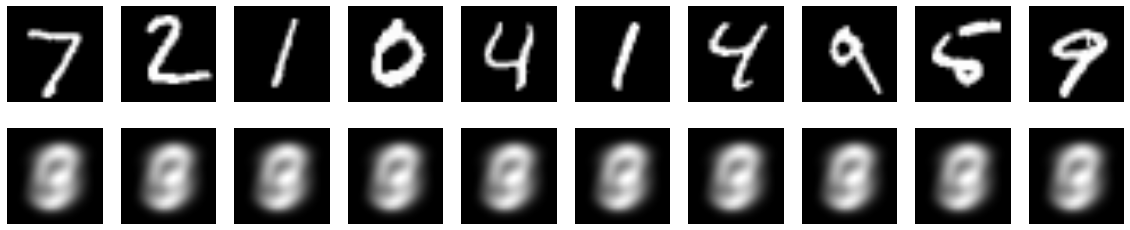

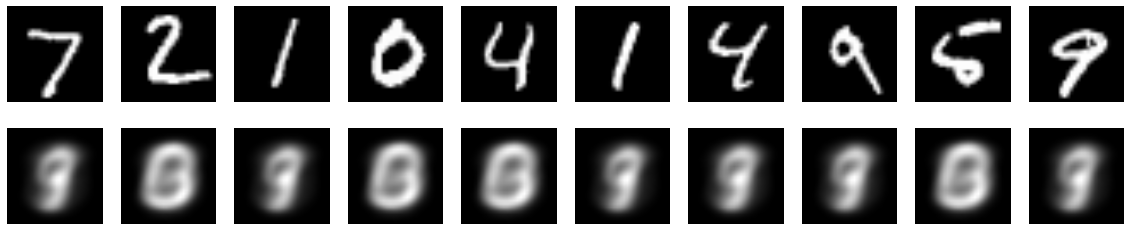

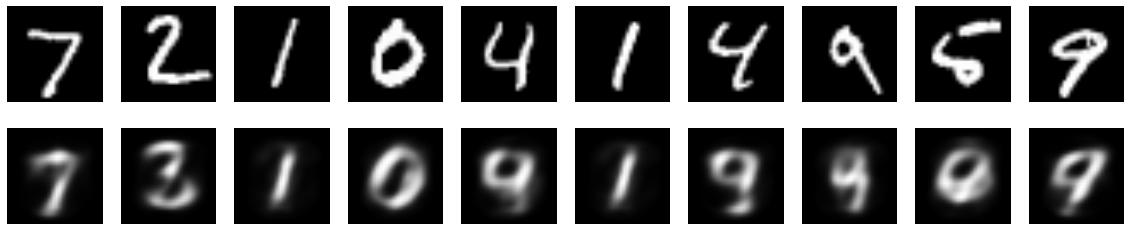

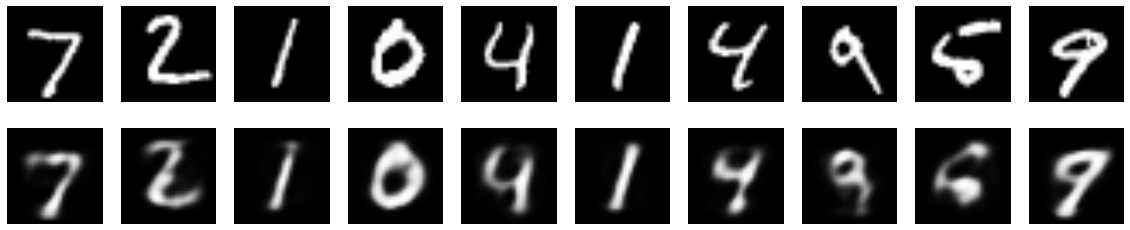

In [28]:
%matplotlib inline
d_prime = [2, 8, 32, 64]
from keras.models import load_model
import matplotlib.pyplot as plt

for d in d_prime:
    autoencoder = load_model('basic_autoencoder_sigmoid_768x'+str(d)+'.h5')
    encoder = load_model('basic_encoder_sigmoid_768x'+str(d)+'.h5')
    decoder = load_model('basic_decoder_sigmoid_768x'+str(d)+'.h5')
    encoded_test = encoder.predict(x_test)
    decoded_test = decoder.predict(encoded_test)

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

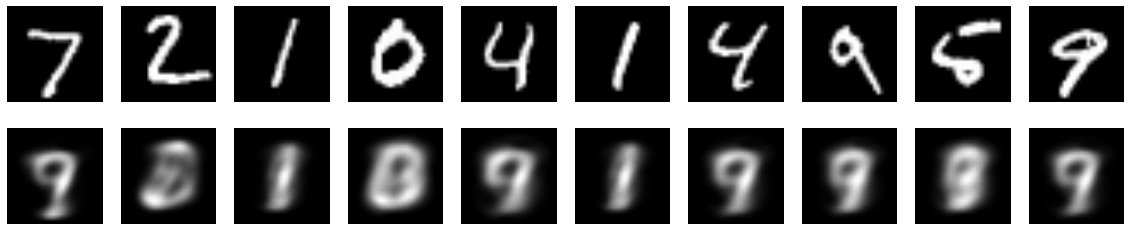

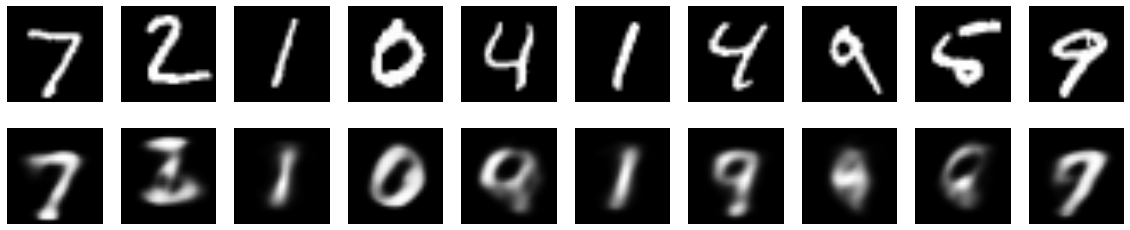

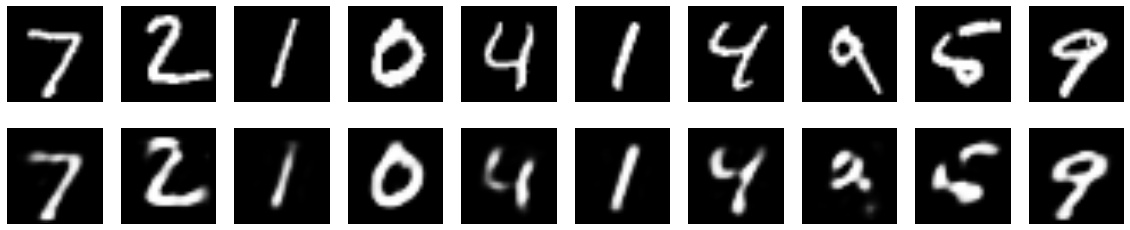

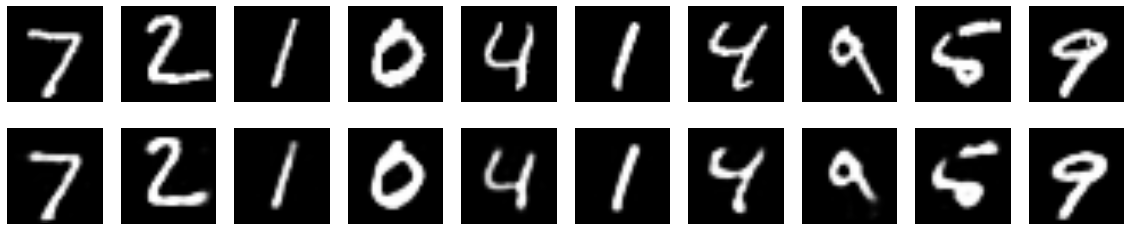

In [29]:
for d in d_prime:
    autoencoder = load_model('basic_autoencoder_relusig_768x'+str(d)+'.h5')
    encoder = load_model('basic_encoder_relusig_768x'+str(d)+'.h5')
    decoder = load_model('basic_decoder_relusig_768x'+str(d)+'.h5')
    encoded_test = encoder.predict(x_test)
    decoded_test = decoder.predict(encoded_test)

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

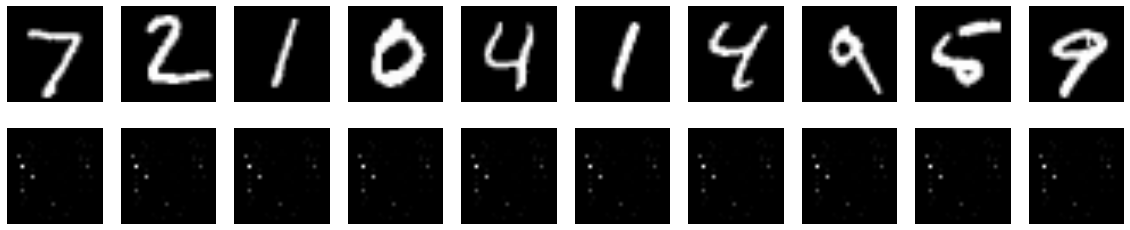

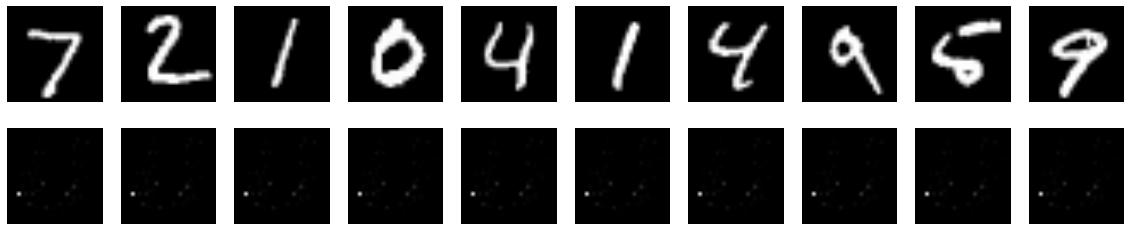

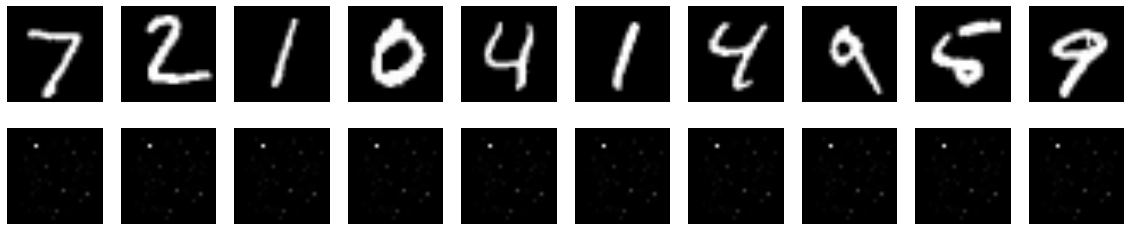

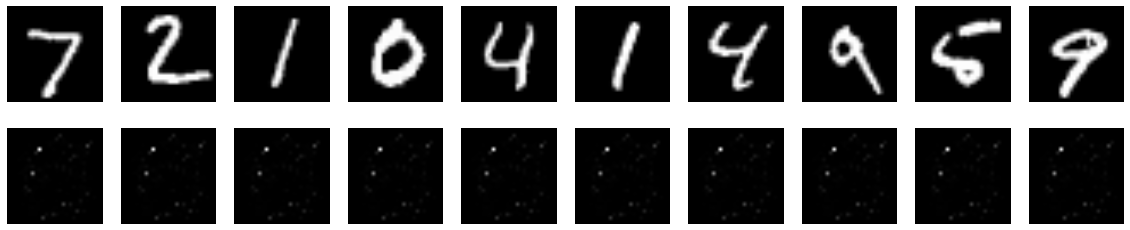

In [32]:
for d in d_prime:
    autoencoder = load_model('basic_autoencoder_sigrelu_768x'+str(d)+'.h5')
    encoder = load_model('basic_encoder_sigrelu_768x'+str(d)+'.h5')
    decoder = load_model('basic_decoder_sigrelu_768x'+str(d)+'.h5')
    encoded_test = encoder.predict(x_test)
    decoded_test = decoder.predict(encoded_test)

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()